In [7]:
%cd /content/drive/MyDrive/multi/0425

/content/drive/MyDrive/multi/0425


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 결정 트리(Decision Tree)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, 
                                                    test_size=0.2, random_state=11)


In [5]:
dtc1 = DecisionTreeClassifier(random_state=156)
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(dtc1, out_file='./data/tree.dot', 
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                impurity=True, filled=True)

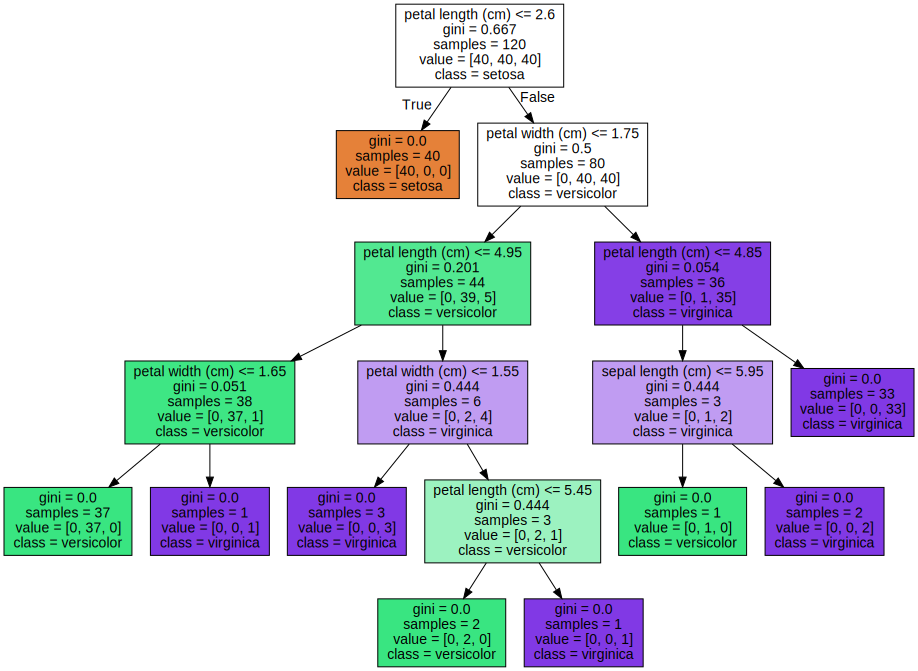

In [9]:
import graphviz

with open('./data/tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

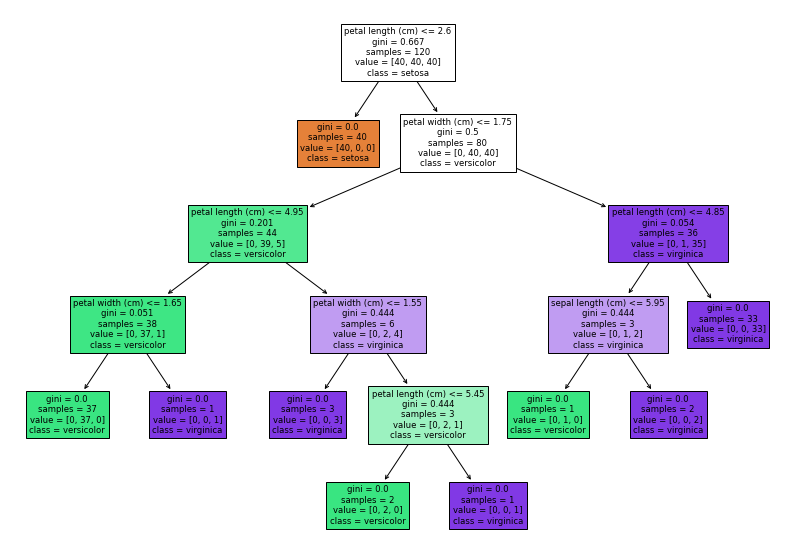

In [11]:
plt.figure(figsize=(14,10))

plot_tree(dtc1, feature_names=iris.feature_names,
          class_names=iris.target_names, 
          filled=True)

plt.show()

### 제약조건

- max_depth = 3

In [12]:
dtc2 = DecisionTreeClassifier(random_state=156, max_depth=3)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [13]:
export_graphviz(dtc2, out_file='./data/tree_max_depth3.dot', 
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                impurity=True, filled=True)

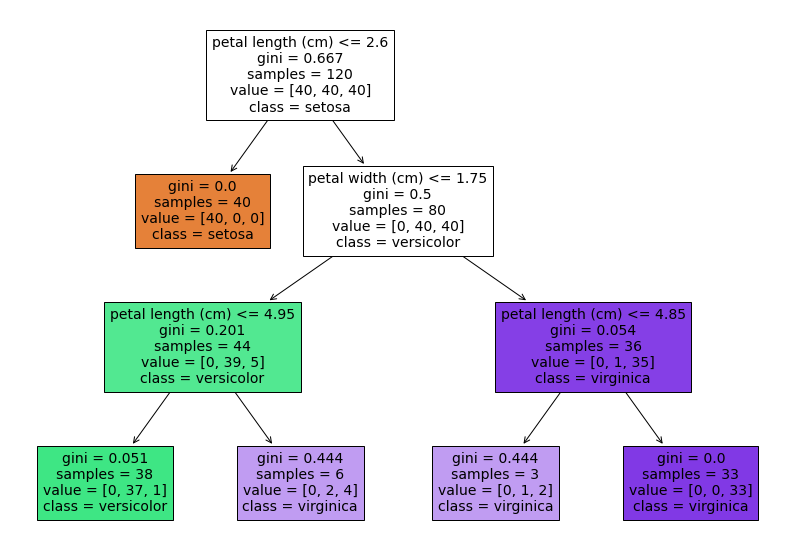

In [14]:
plt.figure(figsize=(14,10))

plot_tree(dtc2, feature_names=iris.feature_names,
          class_names=iris.target_names, 
          filled=True)

plt.show()

In [15]:
dtc3 = DecisionTreeClassifier(random_state=156, max_depth=4)
dtc3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=156)

In [16]:
export_graphviz(dtc3, out_file='./data/tree_max_depth4.dot', 
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                impurity=True, filled=True)

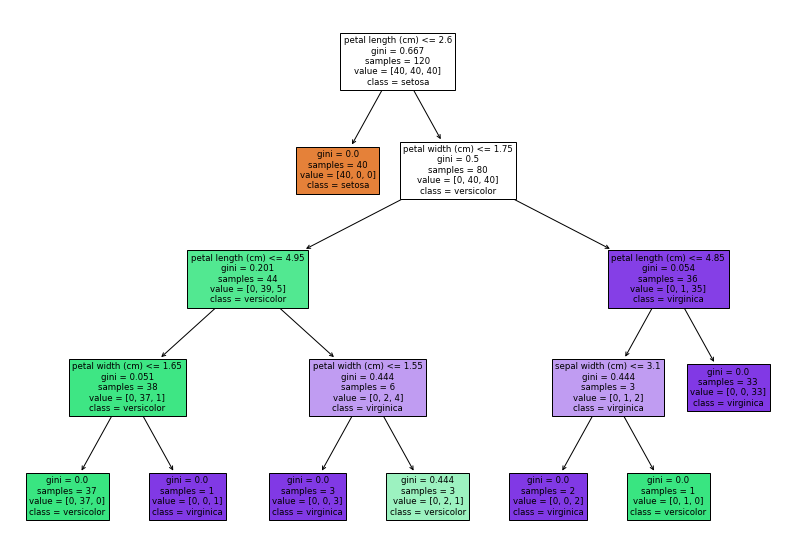

In [17]:
plt.figure(figsize=(14,10))

plot_tree(dtc3, feature_names=iris.feature_names,
          class_names=iris.target_names, 
          filled=True)

plt.show()

- 모델 비교

In [18]:
dtc1.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test)

(1.0, 1.0, 1.0)

### 학습된 모델에 제공하는 정보

In [24]:
import seaborn as sns

In [26]:
dtc1.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

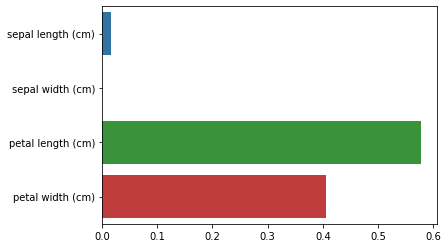

In [34]:
sns.barplot(x=dtc1.feature_importances_, y=iris.feature_names)
plt.show()

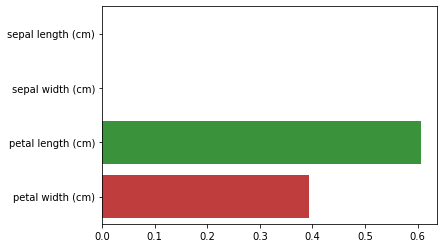

In [35]:
sns.barplot(x=dtc2.feature_importances_, y=iris.feature_names)
plt.show()